In [ ]:
# вариант 28: (cos(x)**2 / (3 + x^3)); [-1, 1]
# Тихомиров Юнес Б20-215
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def func(x):
  return (np.cos(x)) ** 2 / (3 + np.power(x, 3))

In [ ]:
def derivative1(x):
  return (-np.sin(2 * x) * (3 + np.power(x, 3)) - 3 * (x ** 2) * (np.cos(x))**2) / (3 + np.power(x, 3)) ** 2

In [ ]:
def derivative2(x):
  return (-2 * np.cos(2 * x) * (3 + np.power(x, 3)) + 3 * (x ** 2) * np.sin(2 * x) ) / (3 + np.power(x, 3)) ** 2 - 3 *((2 * x * (np.cos(x)) ** 2) / (3 + np.power(x, 3)) ** 2 + (x ** 2) * ((- np.sin(2 * x)*(3+np.power(x, 3)) ** 2 - 6 * (x ** 2) * (3 + np.power(x, 3)) * ((np.cos(x))**2)) / (np.power(3 + np.power(x, 3), 4))))

In [ ]:
def forward1(func, x, h):
    return (func(x + h) - func(x)) / h

def centr1(func, x, h):
    return (func(x + h) - func(x - h)) / (2 * h)

In [ ]:
def centr2order2(func, x, h):
    return (func(x - h) - 2 * func(x) + func(x + h)) / (h ** 2)
  
def centr2order4(func, x, h):
    return (- func(x - 2 * h) + 16 * func(x - h) - 30 * func(x) + 16 * func(x + h) - func(x + 2 * h)) / (12 * (h ** 2))

In [ ]:
a = - 1
b =  1
N = 50
h = (b - a) / (N - 1)

**1-я производная**

In [ ]:
def diff1(): 
  deriv1Nodes = np.arange(a, b + h, h) 
  deriv1Values = list(map(derivative1, deriv1Nodes))

  deriv1CentrNodes = np.arange(a + h, b, h)
  deriv1CentrValues = [centr1(func, x, h) for x in deriv1CentrNodes]

  deriv1ForwardNodes = np.arange(a, b, h)
  deriv1ForwardValues = [forward1(func, x, h) for x in deriv1ForwardNodes]

  fig, axs = plt.subplots(2, figsize = (17, 15))
  # plt.figure(figsize = (18, 8))
  axs[0].plot(deriv1Nodes, deriv1Values, color = 'r', label = 'Exact derivative')
  axs[0].plot(deriv1CentrNodes, deriv1CentrValues, color = 'b', label = 'Numeric derivative (central difference)')
  axs[0].set_title("Analytic and numeric derivative (central difference)")

  axs[1].plot(deriv1Nodes, deriv1Values, color = 'r', label = 'Exact derivative')
  axs[1].plot(deriv1ForwardNodes, deriv1ForwardValues, color = 'g', label = 'Numeric derivative (forward difference)')
  axs[1].set_title("Analytic and numeric derivative (forward difference)")

  for ax in axs:
    ax.set_xlabel("x")
    ax.set_ylabel("f'")
    ax.legend()
    ax.grid(True)
  plt.show()

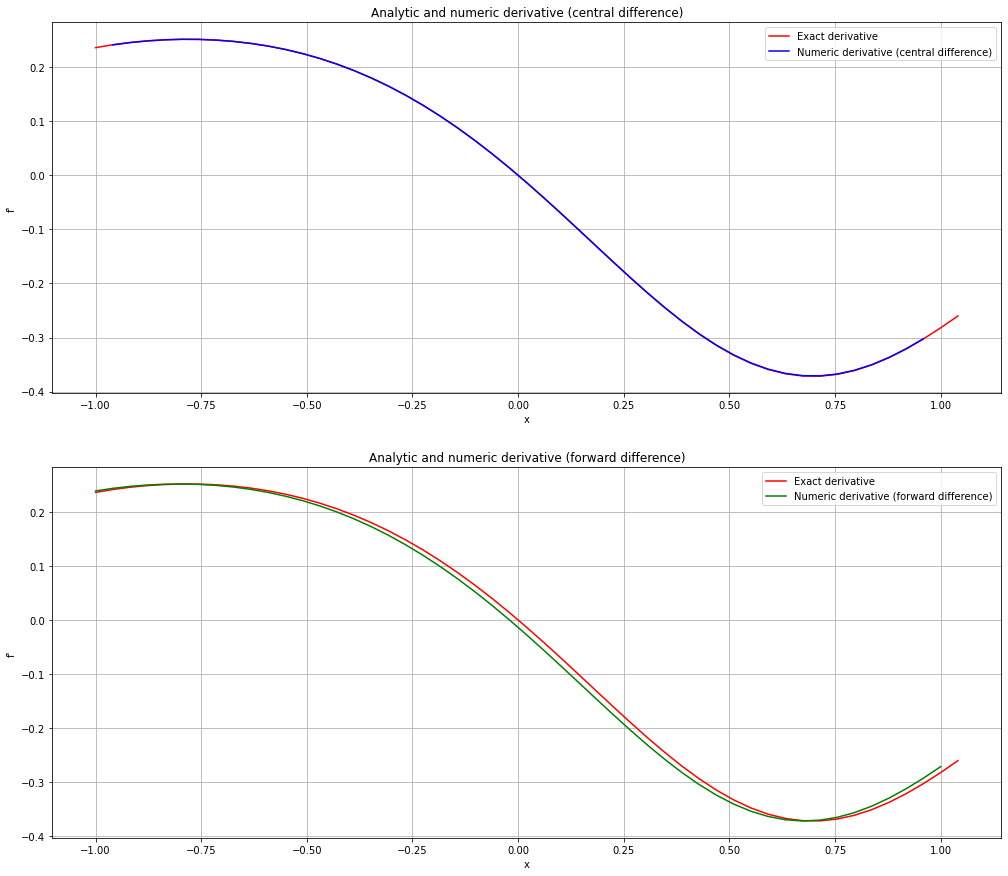

In [ ]:
diff1()

In [ ]:
def diff2(): 
  deriv2Nodes = np.arange(a, b + h, h) 
  deriv2Values = list(map(derivative2, deriv2Nodes))

  deriv2Centr2Nodes = np.arange(a, b + h, h)
  deriv2Centr2Values = [centr2order2(func, x, h) for x in deriv2Centr2Nodes]

  deriv2Centr4Nodes = np.arange(a, b + h, h)
  deriv2Centr4Values = [centr2order4(func, x, h) for x in deriv2Centr4Nodes]

  fig, axs = plt.subplots(2, figsize = (17, 15))
  # plt.figure(figsize = (18, 8))
  axs[0].plot(deriv2Nodes, deriv2Values, color = 'r', label = 'Exact 2nd derivative')
  axs[0].plot(deriv2Centr2Nodes, deriv2Centr2Values, color = 'b', label = 'Numeric derivative (central difference order 2)')
  axs[0].set_title("Analytic and numeric 2nd derivative (central difference order 2)")

  axs[1].plot(deriv2Nodes, deriv2Values, color = 'r', label = 'Exact 2nd derivative')
  axs[1].plot(deriv2Centr4Nodes, deriv2Centr4Values, color = 'g', label = 'Numeric derivative (central difference order 4)')
  axs[1].set_title("Analytic and numeric 2nd derivative (central difference order 4)")

  for ax in axs:
    ax.set_xlabel("x")
    ax.set_ylabel("f''")
    ax.legend()
    ax.grid(True)
  plt.show()

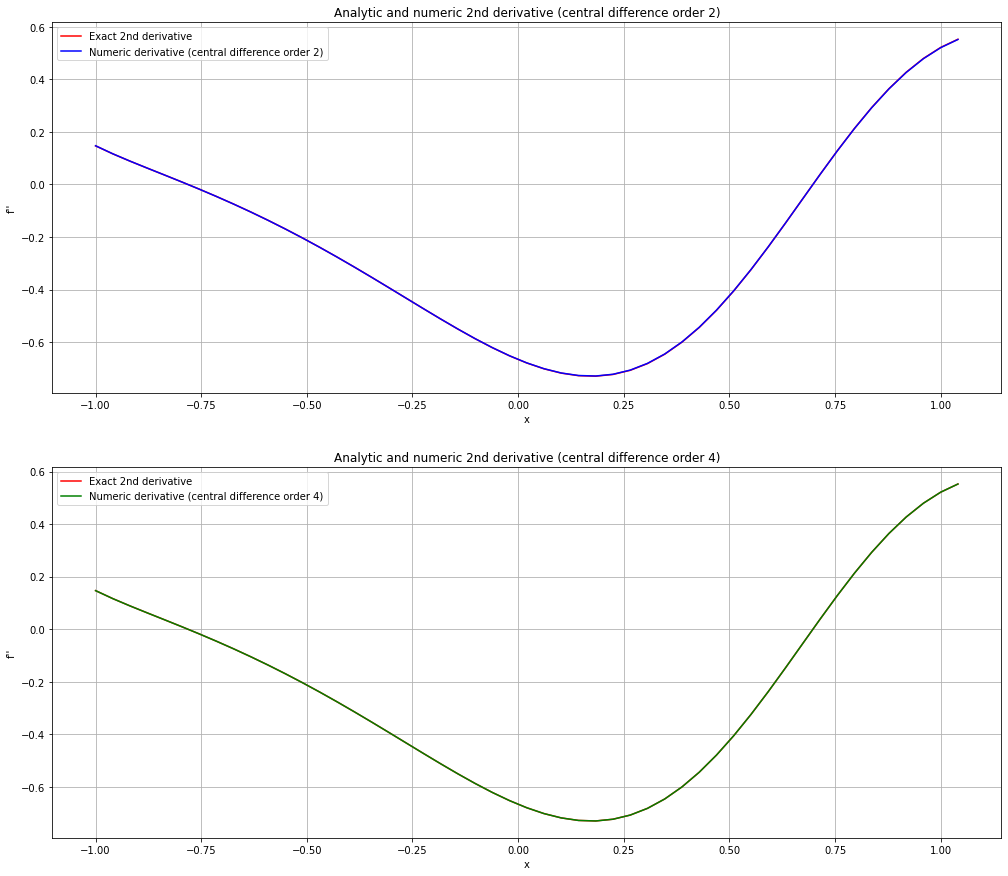

In [ ]:
diff2()

**Погрешности 1-й производной**

In [ ]:
def error1():
  hNewList = []
  maxError1CentrList = []
  maxError1ForwardList = []
  for k in range (50, 500):
    hNew = (b - a) / (k - 1)
    hNewList.append(np.log(hNew))
    deriv1Nodes = np.arange(a, b + hNew, hNew) 
    deriv1Values = list(map(derivative1, deriv1Nodes))

    deriv1CentrNodes = np.arange(a + hNew, b, hNew)
    deriv1CentrValues = [centr1(func, x, hNew) for x in deriv1CentrNodes]

    deriv1ForwardNodes = np.arange(a, b, hNew)
    deriv1ForwardValues = [forward1(func, x, hNew) for x in deriv1ForwardNodes]

    error1Centr = [abs(deriv1Values[i + 1] - deriv1CentrValues[i]) for i in range(k - 2)]
    maxError1Centr = max(error1Centr)
    maxError1CentrList.append(np.log(maxError1Centr))

    error1Forward = [abs(deriv1Values[i] - deriv1ForwardValues[i]) for i in range(k - 2)]
    maxError1Forward = max(error1Forward)
    maxError1ForwardList.append(np.log(maxError1Forward))
  
  fig, axs = plt.subplots(2, figsize = (17, 15))
  # plt.figure(figsize = (18, 8))
  axs[0].plot(hNewList, maxError1CentrList, color = 'r', label = 'log(δ(h))')
  axs[0].set_title("Log plot of errors (1st derivative Central difference)")

  axs[1].plot(hNewList, maxError1ForwardList, color = 'r', label = 'log(δ(h))')
  axs[1].set_title("Log plot of errors (1st derivative Forward difference)")

  for ax in axs:
    ax.set_xlabel("log(h)")
    ax.set_ylabel("log(δ(h))")
    ax.legend()
    ax.grid(True)
  plt.show()

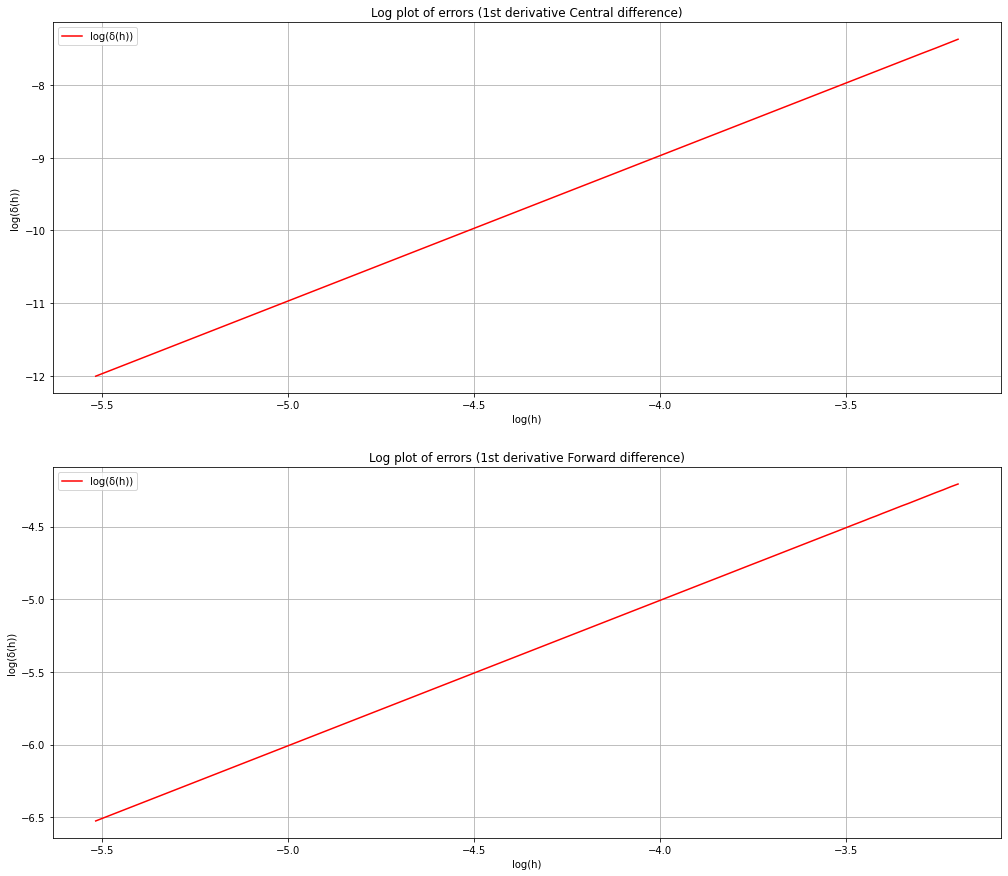

In [ ]:
error1()

**Погрешности 2-й производной**

In [ ]:
def error2():
  hNewList = []
  maxError2Centr2List = []
  maxError2Centr4List = []
  for k in range (50, 500):
    hNew = (b - a) / (k - 1)
    hNewList.append(np.log(hNew))
    deriv2Nodes = np.arange(a, b + hNew, hNew) 
    deriv2Values = list(map(derivative2, deriv2Nodes))

    deriv2Centr2Nodes = np.arange(a, b + hNew, hNew)
    deriv2Centr2Values = [centr2order2(func, x, hNew) for x in deriv2Centr2Nodes]

    deriv2Centr4Nodes = np.arange(a, b + hNew, hNew)
    deriv2Centr4Values = [centr2order4(func, x, hNew) for x in deriv2Centr4Nodes]

    error2Centr2 = [abs(deriv2Values[i] - deriv2Centr2Values[i]) for i in range(k - 2)]
    maxError2Centr2 = max(error2Centr2)
    maxError2Centr2List.append(np.log(maxError2Centr2))

    error2Centr4 = [abs(deriv2Values[i] - deriv2Centr4Values[i]) for i in range(k - 2)]
    maxError2Centr4 = max(error2Centr4)
    maxError2Centr4List.append(np.log(maxError2Centr4))
  
  fig, axs = plt.subplots(2, figsize = (17, 15))
  # plt.figure(figsize = (18, 8))
  axs[0].plot(hNewList, maxError2Centr2List, color = 'r', label = 'log(δ(h))')
  axs[0].set_title("Log plot of errors (2nd derivative q = 2)")

  axs[1].plot(hNewList, maxError2Centr4List, color = 'r', label = 'log(δ(h))')
  axs[1].set_title("Log plot of errors (2nd derivative q = 4)")

  for ax in axs:
    ax.set_xlabel("log(h)")
    ax.set_ylabel("log(δ(h))")
    ax.legend()
    ax.grid(True)
  plt.show()

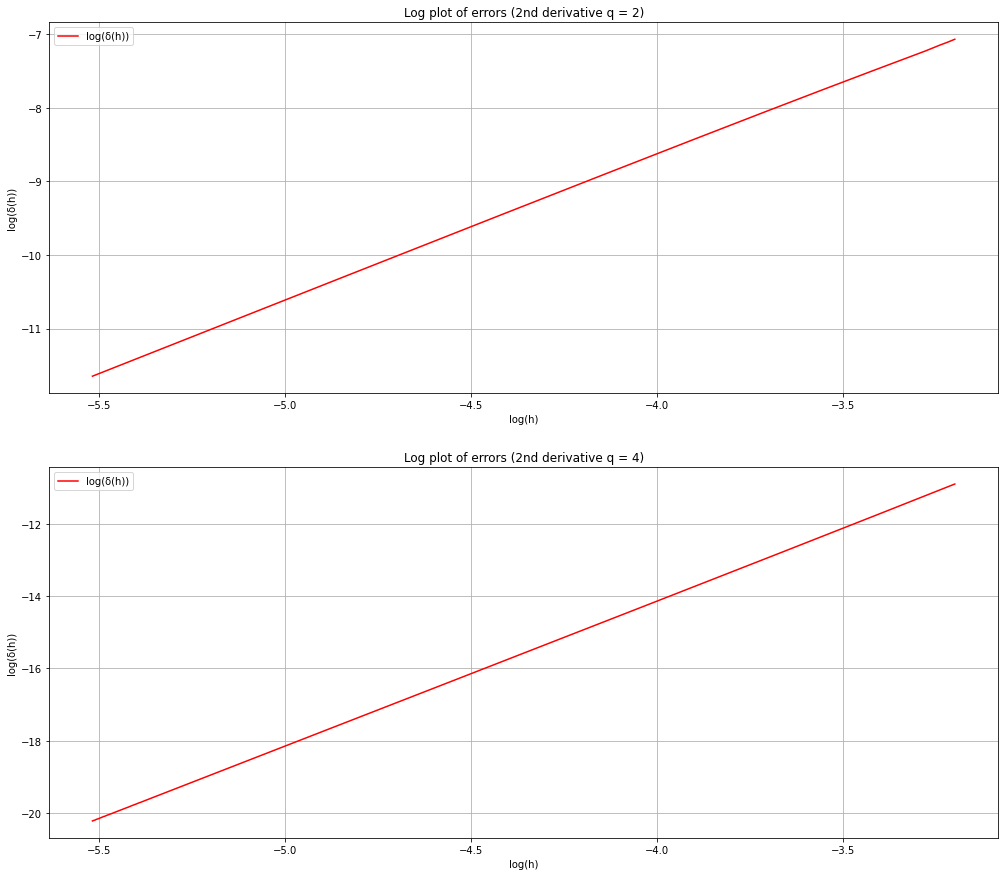

In [ ]:
error2()